# **Creating Visualizations for Data Analysis**

In this assignment, you will have the opportunity to demonstrate the skills you have acquired in creating visualizations using *Matplotlib, Seaborn, Folium*.

###  Objectives

After completing this lab you will be able to:

- Create informative and visually appealing plots with Matplotlib and Seaborn.
- Apply visualization to communicate insights from the data.
- Analyze data through using visualizations.
- Customize visualizations

### Scenario

In this assignment you will be tasked with creating plots which answer questions for analysing "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods.<br>
recession period 1 - year 1980 <br>
recession period 2 - year 1981 to 1982<br>
recession period 3 - year 1991<br>
recession period 4 - year 2000 to 2001<br>
recession period 5 - year end 2007 to mid 2009<br>
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>

### Data Description

The dataset used for this visualization assignment contains *historical_automobile_sales* data representing automobile sales and related variables during recession and non-recession period.

The dataset includes the following variables:
<br>1. Date: The date of the observation.
<br>2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
<br>3. Automobile_Sales: The number of vehicles sold during the period.
<br>4. GDP: The per capita GDP value in USD.
<br>5. Unemployment_Rate: The monthly unemployment rate.
<br>6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
<br>7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
<br>8. Price: The average vehicle price during the period.
<br>9. Advertising_Expenditure: The advertising expenditure of the company.
<br>10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar,                 Mediumfamilycar, Executivecar, Sports.
<br>11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
<br>12.Month: Month of the observation extracted from Date..
<br>13.Year: Year of the observation extracted from Date.
<br>
By examining various factors mentioned above from the dataset, you aim to gain insights into how recessions impacted automobile sales for your company.


In [ ]:
%pip install seaborn
%pip install folium

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

%matplotlib inline

In [3]:
# Importing Data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

df = pd.read_csv(url)

# Renomeando as colunas para minúsculas
df.columns = df.columns.str.lower()

# Shape of Data
print('Total Rowns: ', df.shape[0])
print('Total Cols: ', df.shape[1])

# Print first 5 rows
df.head()



Total Rowns:  528
Total Cols:  15


,date,year,month,recession,consumer_confidence,seasonality_weight,price,advertising_expenditure,competition,gdp,growth_rate,unemployment_rate,automobile_sales,vehicle_type,city
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [4]:
# Dtypes
df.dtypes

date                        object
year                         int64
month                       object
recession                    int64
consumer_confidence        float64
seasonality_weight         float64
price                      float64
advertising_expenditure      int64
competition                  int64
gdp                        float64
growth_rate                float64
unemployment_rate          float64
automobile_sales           float64
vehicle_type                object
city                        object
dtype: object

In [5]:
# Convert colum to 'date' type
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')


In [6]:
# Check Null Values - ok
df.isnull().sum()

date                       0
year                       0
month                      0
recession                  0
consumer_confidence        0
seasonality_weight         0
price                      0
advertising_expenditure    0
competition                0
gdp                        0
growth_rate                0
unemployment_rate          0
automobile_sales           0
vehicle_type               0
city                       0
dtype: int64

In [7]:
# Check duplicated values - ok
df.duplicated().sum()

np.int64(0)

In [8]:
# Describe Numeric Variables
df.describe(include=['int64', 'float64'])

,year,recession,consumer_confidence,seasonality_weight,price,advertising_expenditure,competition,gdp,growth_rate,unemployment_rate,automobile_sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [9]:
# Describe Categorical Variables
df.describe(include='object')

,month,vehicle_type,city
count,528,528,528
unique,12,5,4
top,Jan,Mediumfamilycar,New York
freq,44,166,144


## Data Analysis during Recession Periods

In [10]:
# Recession Years listed and Dataframe
df_recession = df[df['recession']== 1]

recession_years = [1980, 1981, 1982, 1991, 2000, 2001, 2007, 2008, 2009, 2020]

#### 1. Show how automobile sales fluctuate from year to year and mark the years with recession

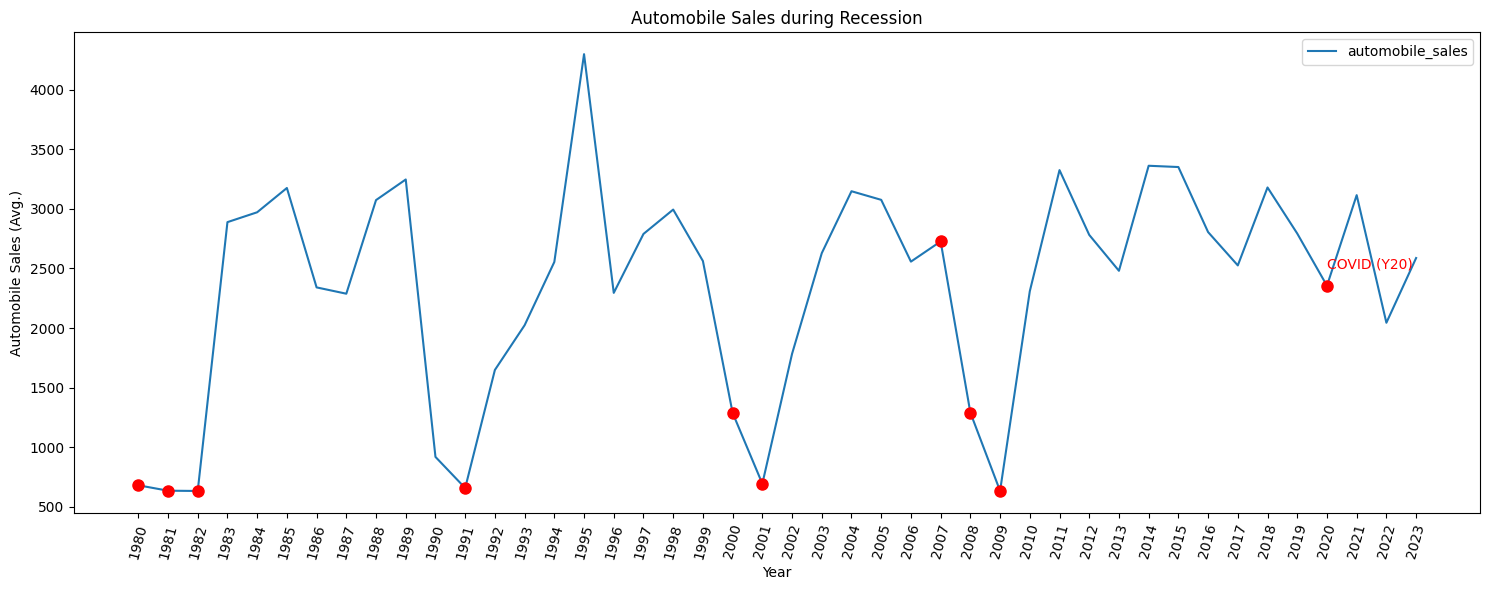

In [12]:
#create data for plotting
df_line = df.groupby(['year'])['automobile_sales'].mean().reset_index()
df_line.set_index('year', inplace=True)

# to check years of recession filtered 
#recession_years = df_recession['year'].unique()
#recession_years.tolist()


#create figure and axis
fig, ax =plt.subplots(figsize=(15,6))

# Plot the line chart
df_line.plot(kind='line', ax=ax, legend=True)

# Add markers in recession periods
for year in recession_years:
    if year in df_line.index:
        ax.plot(year, df_line.loc[year, 'automobile_sales'], 
                marker='o', color='red', markersize=8)

plt.xticks(list(range(1980, 2024)), rotation=75)
plt.xlabel('Year')
plt.ylabel('Automobile Sales (Avg.)')
plt.title('Automobile Sales during Recession')
plt.text(2020, 2500, 'COVID (Y20)', color='red') #recession period 6 - year 2020 -Feb to April (Covid-19 Impact)
plt.tight_layout()
fig.savefig('../images/01_automobile_sales_during_recession')

#### 2. Is there a noticeable difference in sales trends between different vehicle types during recession periods?

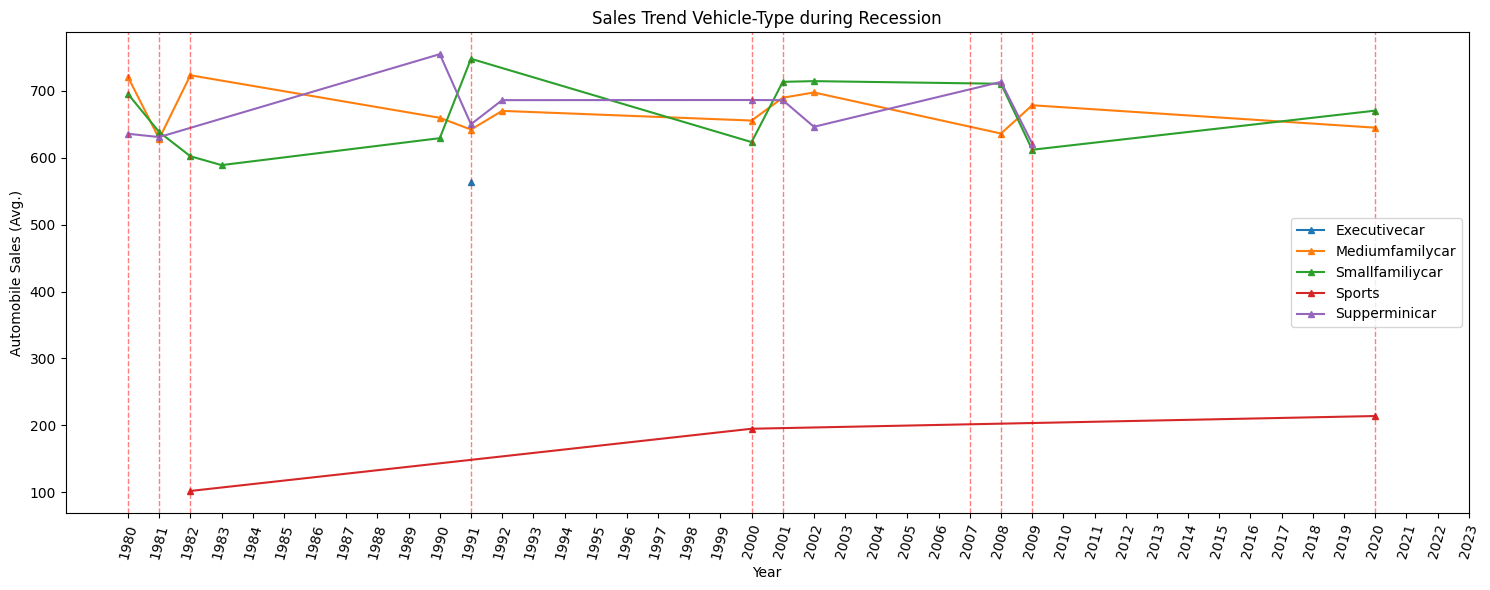

In [13]:
# Groupping data by year and vehicle type
df_Mline = df_recession.groupby(['year', 'vehicle_type'], as_index=False)['automobile_sales'].mean()
df_Mline.set_index('year', inplace=True)

#create figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# # Plot by indiviual line (ax.plot())
for vehicle_type, group_data in df_Mline.groupby('vehicle_type'):
    ax.plot(group_data.index, 
            group_data['automobile_sales'], 
            label=vehicle_type, 
            marker='^', 
            linestyle='-', 
            markersize=5)
    
# Add grids in recession periods
for year in recession_years:
    ax.axvline(x=year, color='red', linestyle='--', linewidth=1, alpha=0.5)

# Customization
plt.xticks(list(range(1980, 2024)), rotation=75)
plt.xlabel('Year')
plt.ylabel('Automobile Sales (Avg.)')
plt.title('Sales Trend Vehicle-Type during Recession')
plt.legend()
plt.tight_layout()
fig.savefig('../images/02_sales_trend_vehicle_type_during_recession')


#### 3. Compare the sales trend per vehicle type for a recession period with a non-recession period.
Library: Seaborn

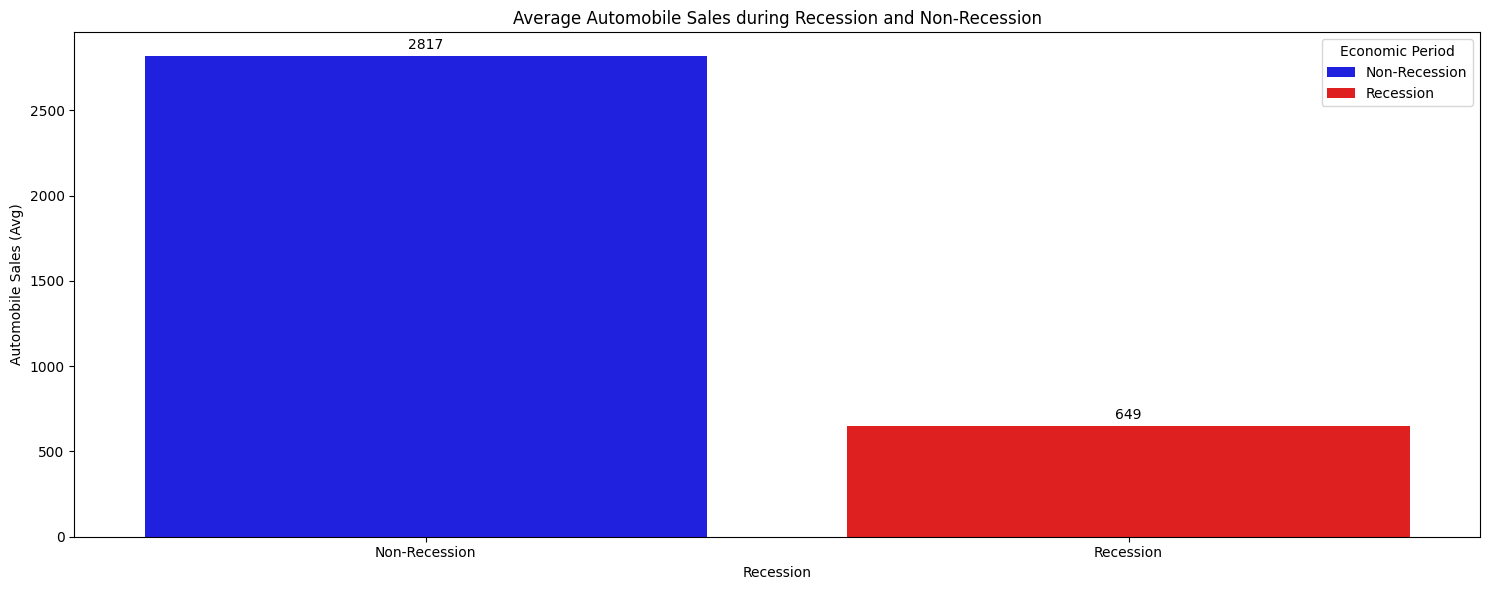

In [38]:
df_Rbar = df.groupby(['recession'])['automobile_sales'].mean().reset_index()

#create figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

custom_colors = {1: '#1f77b4', 0: '#ff7f0e'} # #1f77b4(blue) / #ff7f0e(orange)

# Plot the Bar Chart
barplot = sns.barplot(
    x='recession',
    y='automobile_sales',
    hue='recession',
    data=df_Rbar,
    palette=['blue', 'red'],
    ax=ax
)

# Add the labels
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

# Rename legends
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['Non-Recession', 'Recession'], title='Economic Period')

# Customization
plt.xlabel('Recession')
plt.ylabel('Automobile Sales (Avg)')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0,1], labels=['Non-Recession', 'Recession'])
plt.tight_layout()

# Save chart
fig.savefig('../images/03_automobile_sales_during_by_recession')

#### 4. compare the sales of different vehicle types during a recession and a non-recession period

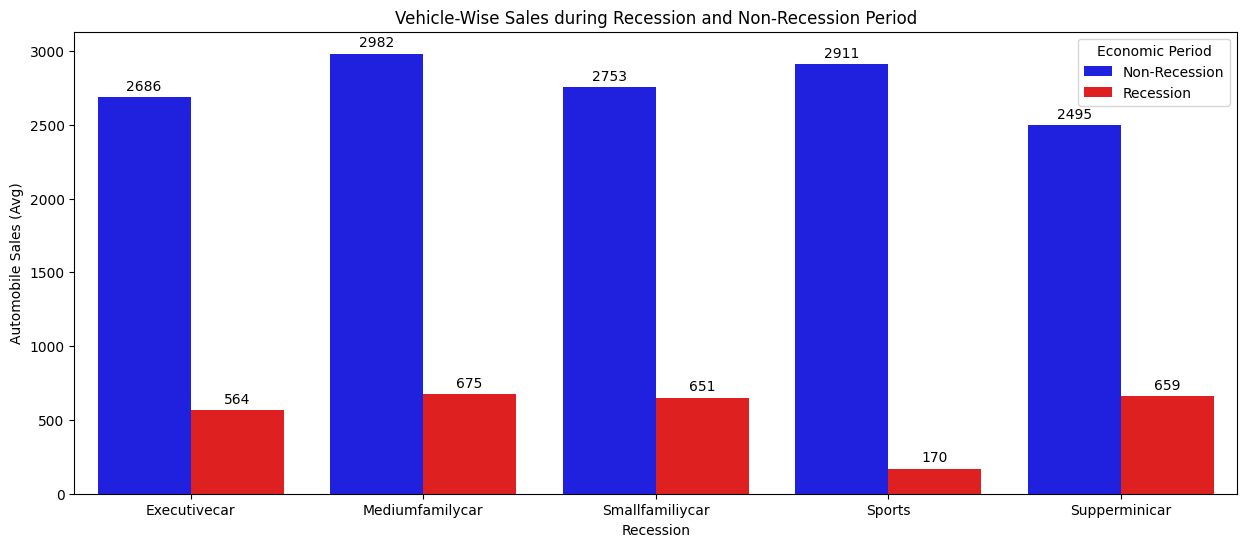

In [39]:
# Groupping Data 
df_Rtypebar = df.groupby(['recession', 'vehicle_type'])['automobile_sales'].mean().reset_index()

# Create the Fig and axis
fig, ax = plt.subplots(figsize=(15,6))

# Plot the Bar Chart
multibarplot = sns.barplot(
    x='vehicle_type',
    y='automobile_sales',
    hue='recession',
    data=df_Rtypebar,
    palette=['blue', 'red'],
    ax=ax
)
# Add labels data bar
for container in multibarplot.containers:
    multibarplot.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

# Rename legends
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['Non-Recession', 'Recession'], title='Economic Period')

# Customization
plt.xlabel('Recession')
plt.ylabel('Automobile Sales (Avg)')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

# Save the fig file
fig.savefig('../images/04_automobile_sales_by_type_during_by_recession')

**Inference:** From this plot, we can understand that there is a drastic decline in the overall sales of the automobiles during recession.
However, the most affected type of vehicle is executivecar and sports